<a href="https://colab.research.google.com/github/Elsacred02/assignment_2_advanced_machine_learning/blob/main/Problema2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Caricamento dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [3]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train_flat = x_train.reshape(-1, 3072)
x_test_flat = x_test.reshape(-1, 3072)

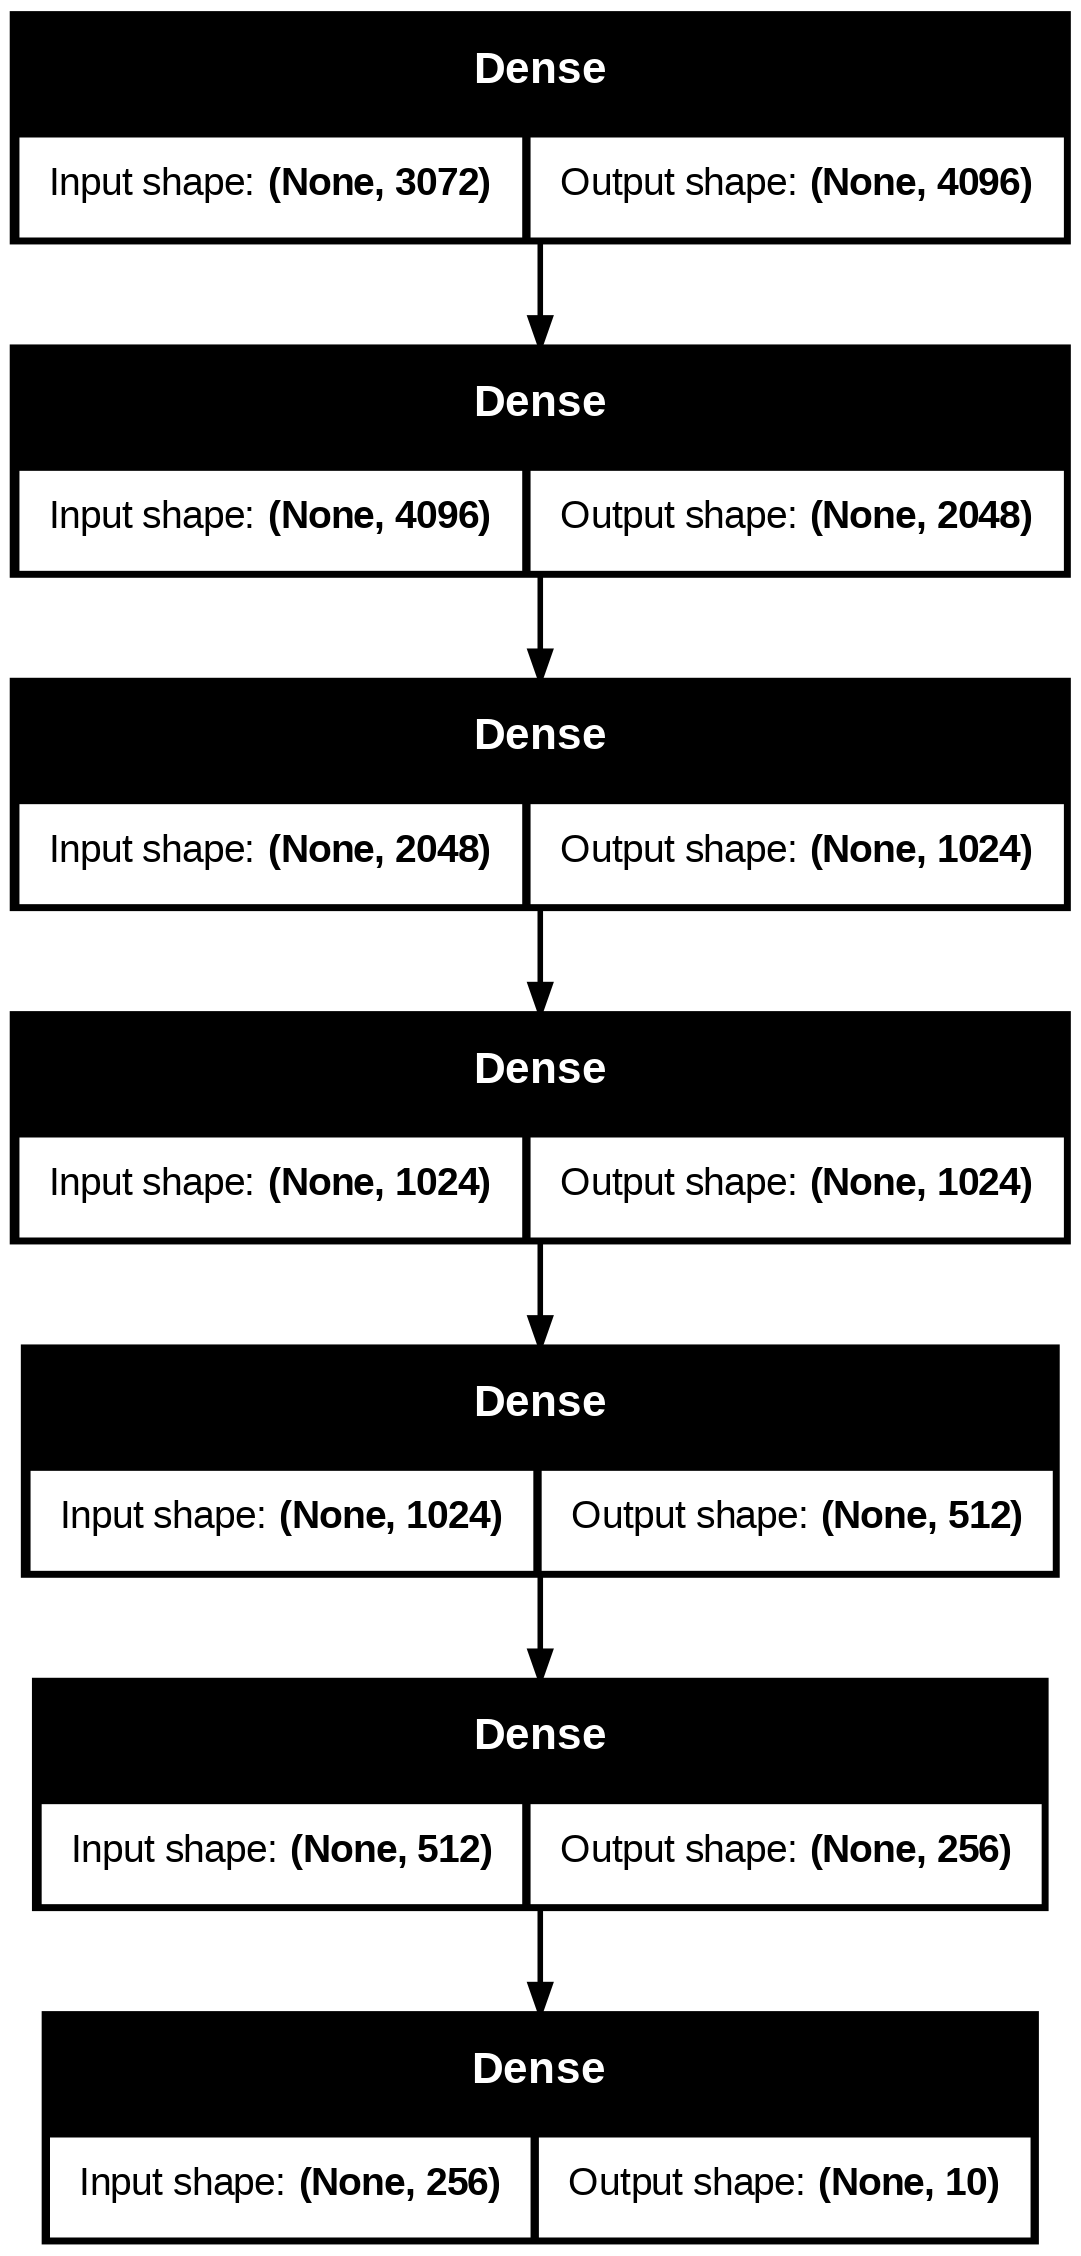

In [4]:
model = keras.Sequential([
    layers.Input(shape=(3072,)),
    layers.Dense(4096, activation='relu', name='layer-one'),
    layers.Dense(2048, activation='relu', name='layer-two'),
    layers.Dense(1024, activation='relu', name='layer-three'),
    layers.Dense(1024, activation='relu', name='layer-four'),
    layers.Dense(512, activation='relu', name='layer-five'),
    layers.Dense(256, activation='relu', name='layer-six'),
    layers.Dense(10, activation='softmax', name='layer-seven')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

keras.utils.plot_model(model, show_shapes = True)

In [5]:
history = model.fit(
    x_train_flat, y_train,
    batch_size=128,
    epochs=100,
    validation_data=(x_test_flat, y_test),
    verbose=1
)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.1782 - loss: 2.3031 - val_accuracy: 0.3354 - val_loss: 1.8363
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3418 - loss: 1.7963 - val_accuracy: 0.3779 - val_loss: 1.7033
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3856 - loss: 1.6919 - val_accuracy: 0.4238 - val_loss: 1.6146
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4202 - loss: 1.6121 - val_accuracy: 0.4076 - val_loss: 1.6260
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4343 - loss: 1.5646 - val_accuracy: 0.4475 - val_loss: 1.5494
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4584 - loss: 1.5054 - val_accuracy: 0.4597 - val_loss: 1.5274
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4756 - loss: 1.4661 - val_accuracy: 0.4818 - val_loss: 1.4698
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4910 - loss: 1.4173 - v

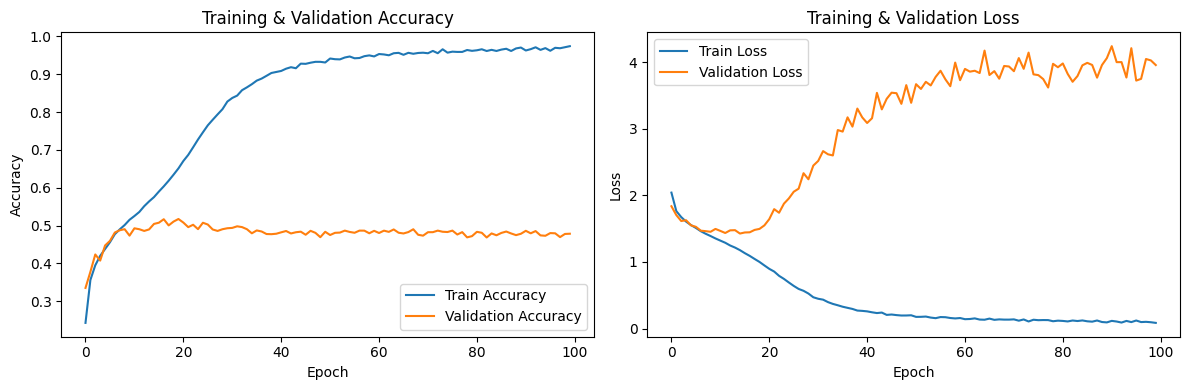

In [7]:
# Plot dei risultati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training & Validation Accuracy')
ax1.legend()

# Loss plot
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training & Validation Loss')
ax2.legend()

plt.tight_layout()
plt.savefig('problem2_original_results.png')
plt.show()